## Project2  探索数据集

* 从seanlahman.com下载棒球赛数据集，包括从 1871 年到 2014年完整的棒球赛数据，包括击球、投球、防守、排名、球队、管理记录、季后赛等27个文件，我只选择了一部分相对感兴趣的数据集进行分析。
* 以下包括分析过程的几个步骤：
    1、提出问题
    2、数据整理
    3、探索阶段
    4、结论
    5、沟通

### 提出问题

首先从几个方面入手，在master table中展示了球员的一些个人信息，包括出生年月地区、身高体重等。我首先想到《异类》（outliers）一书中提到的马太效应，由于年龄分组日的影响，进入到职业联盟的运动员可能在出生月份上呈现趋势，我非常想要验证这点，所以在接下来的问题和分析中会做出解释；

其次我也想要了解，不同的体育项目运动员的身材也有所不同，那么棒球运动员的身型是怎样的，而且，随着竞技体育的发展，运动员的平均身高体重在这些年间有过变化么？


所以首先提出两个问题：
* 运动员在几月出生？是否有集中月份？
* 棒球运动员的身高体重是怎样的？不同时代的运动员身高体重是否有所不同？

### 数据整理

In [16]:
# 首先import需要用到的libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### 问题1 ：运动员的出生月份

#### 文件：Master.csv

In [17]:
# 读取csv文件
master_df = pd.read_csv('Master.csv')

# 返回前几行查看一下
master_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [18]:
# 看一下数据总行列数
master_df.shape

(19105, 24)

In [19]:
# 看一下数据缺失的情况
master_df.isnull().sum()

playerID           0
birthYear        132
birthMonth       302
birthDay         449
birthCountry      69
birthState       571
birthCity        180
deathYear       9664
deathMonth      9665
deathDay        9666
deathCountry    9669
deathState      9715
deathCity       9674
nameFirst         37
nameLast           0
nameGiven         37
weight           854
height           785
bats            1185
throws           979
debut            195
finalGame        195
retroID           56
bbrefID            2
dtype: int64

从数据缺失情况看，在19105条数据中， playerID 和 nameLast 最为完整。和death相关的数据有较多空白，因为只有过世的运动员才有这部分数据。

In [20]:
# 分析出生月份，只需要两列
birthmonth_raw = master_df[['playerID','birthMonth']]

# 删除缺失的行
birthmonth_df = birthmonth_raw.dropna()

print birthmonth_df.shape
birthmonth_df.head()

(18803, 2)


,playerID,birthMonth
0,aardsda01,12.0
1,aaronha01,2.0
2,aaronto01,8.0
3,aasedo01,9.0
4,abadan01,8.0


#### 问题2：棒球运动员的身高、体重
#### 文件：Master.csv

In [51]:
# 分析身高体重，保留必要的列
height_and_weight_raw = master_df[['playerID','birthYear','height','weight']]

# 删除出生年份、身高、体重中缺失数据的行
height_and_weight_df = height_and_weight_raw.dropna()

print height_and_weight_df.shape
height_and_weight_df.head()

(18187, 4)


,playerID,birthYear,height,weight
0,aardsda01,1981.0,75.0,215.0
1,aaronha01,1934.0,72.0,180.0
2,aaronto01,1939.0,75.0,190.0
3,aasedo01,1954.0,75.0,190.0
4,abadan01,1972.0,73.0,184.0


In [72]:
# 根据运动员的出生年份划分几个区间
# 1900年之前、1900年到1940年、1940年到1980年、1980年之后

def convert_birthyear(birthyear):
    if birthyear < 1900:
        return '<1900'
    elif birthyear < 1940:
        return '[1900,1940)'
    elif birthyear < 1980:
        return '[1940,1980)'
    else:
        return '>=1980'

height_and_weight = height_and_weight_df
period = height_and_weight_df['birthYear'].apply(convert_birthyear)
height_and_weight = height_and_weight.assign(period=period.values)

height_and_weight.head()

,playerID,birthYear,height,weight,period
0,aardsda01,1981.0,75.0,215.0,>=1980
1,aaronha01,1934.0,72.0,180.0,"[1900,1940)"
2,aaronto01,1939.0,75.0,190.0,"[1900,1940)"
3,aasedo01,1954.0,75.0,190.0,"[1940,1980)"
4,abadan01,1972.0,73.0,184.0,"[1940,1980)"


In [73]:
# 由于不太熟悉pound和inch，转换一下单位

# weight Player's weight in pounds  # 把体重单位换为kg
# height Player's height in inches  # 把身高单位换为cm
# 1 pound = 0.4535924 kg
# 1 inch = 2.54 cm

def convert_unit(column):
    if column.name == "weight":
        return column * 0.4535924
    elif column.name == "height":
        return column * 2.54
    else:
        return column

height_and_weight = height_and_weight.apply(convert_unit)
height_and_weight.head()

,playerID,birthYear,height,weight,period
0,aardsda01,1981.0,190.50,97.522366,>=1980
1,aaronha01,1934.0,182.88,81.646632,"[1900,1940)"
2,aaronto01,1939.0,190.50,86.182556,"[1900,1940)"
3,aasedo01,1954.0,190.50,86.182556,"[1940,1980)"
4,abadan01,1972.0,185.42,83.461002,"[1940,1980)"


### 数据探索阶段

#### * 球员的出生月份

值得一提的是，通过搜索得知，美国所有非学生组棒球队年龄分组日为7月31日，这也意味着，一个小选手如果他的出生日期恰好在7月31日以前，那么他将和其他比他大12个月之内的选手们分到同一年龄组，在青少年选手中，他的身体发育和心理成熟度相比于其他人的差异是不可忽视的。在未来不断的训练竞争和比赛中，劣势可能不断的累积。而一个恰好在8月出生的球员，由于在他的组别中生日最大，从一开始因发育凸显出的优势被放大，在今后的训练中，不断获得资源倾斜，积累优势，能够进入棒球职业联盟的几率大大增加。

所以我们做出一个大胆的假设，在我们的职业棒球比赛数据中，7月31日以前临近月份出生的运动员，会明显少于7月31日以后临近月份出生的运动员。

In [74]:
# 首先对master_df按出生月份分组，并返回group size

grouped_by_birthmonth = birthmonth_df.groupby(['birthMonth'],as_index=True).size()
grouped_by_birthmonth

birthMonth
1.0     1631
2.0     1439
3.0     1528
4.0     1450
5.0     1449
6.0     1366
7.0     1503
8.0     1831
9.0     1661
10.0    1759
11.0    1620
12.0    1566
dtype: int64

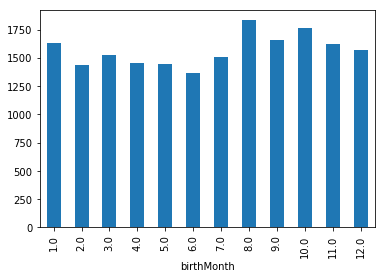

In [75]:
grouped_by_birthmonth.plot(kind='bar')

从图中可以观察到，职业棒球运动员的出生最多的月份为8月，但并不能完全证明是分组日对这一现象的影响。不过出现和之前假设相似的结果，还是有“马太效应”造成影响的可能性。

#### * 运动员的身高体重

In [85]:
# 运动员的平均身高 unit=cm
height_and_weight['height'].mean()

183.61419365478

In [86]:
# 运动员的平均体重 unit=kg
height_and_weight['weight'].mean()

84.57002965580152

In [87]:
# 按照period进行分组

grouped_height_and_weight = height_and_weight.groupby(['period'],as_index=True)
grouped_height_and_weight['height','weight'].mean()

,height,weight
period,,
<1900,178.601440,77.679562
>=1980,187.297595,95.090602
"[1900,1940)",182.809656,82.145657
"[1940,1980)",186.172766,86.693830


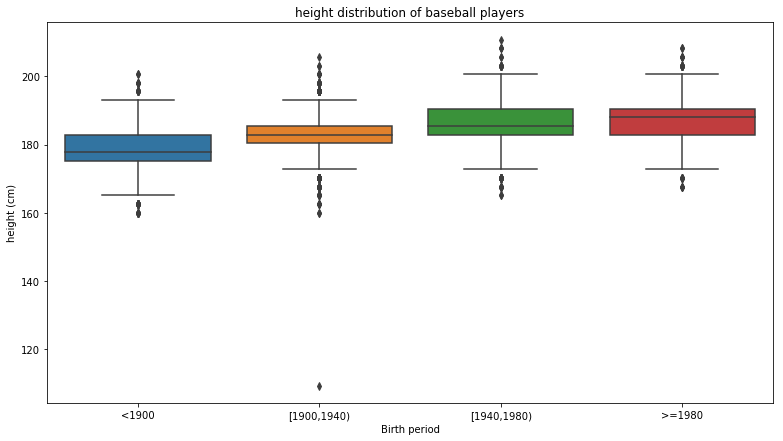

In [103]:
figure = plt.figure(figsize=(13, 7))
ax = sns.boxplot(x="period", y="height", data=height_and_weight, order=['<1900','[1900,1940)','[1940,1980)','>=1980'])
texts = ax.set(xlabel='Birth period', ylabel='height (cm)', title='height distribution of baseball players')

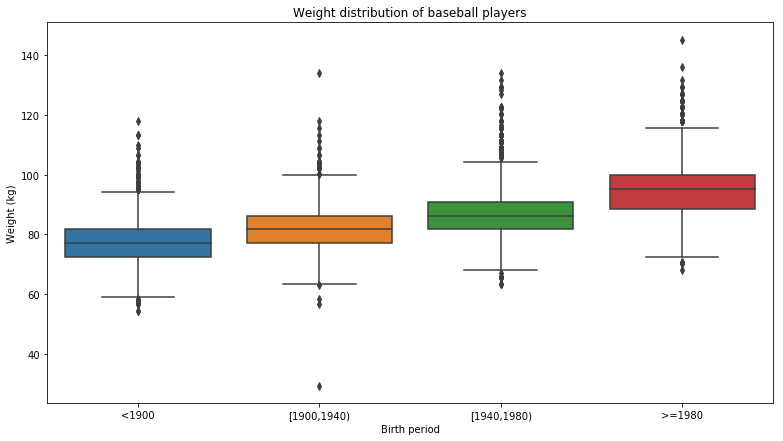

In [104]:
figure = plt.figure(figsize=(13, 7))
ax = sns.boxplot(x="period", y="weight", data=height_and_weight,order=['<1900','[1900,1940)','[1940,1980)','>=1980'])
texts = ax.set(xlabel='Birth period', ylabel='Weight (kg)', title='Weight distribution of baseball players')

从箱线图中可以观察到，随时间的变化，职业棒球运动员也有平均身高和平均体重增长的趋势。我们可以观察到，在身高和体重的分布中均有一些outliers在分布在max的位置。

### 结论阶段

1、 关于棒球运动员出生月份的问题，统计结果显示更多的运动员出生在8月，即年轻运动员分组日（7月31日）之后，印证了此前关于分组日对进入到职业联盟的棒球运动员影响的假设，会使得刚好在分组日之后出生的运动员有一定的优势。但不能说明二者有因果关系，还有很多其他主要因素的影响，这里只是提出一个想法，只能说存在相关的可能性。

2、 从棒球运动员的身高体重来看，平均身高183.61cm，平均体重84.57kg，如果有其他体育项目运动员的身高体重数据，就可以发现不同项目运动员身材的差异。另外，随时间的变化，目前数据中，晚出生的运动员较之前出生运动员，平均身高更高，平均体重更重。

### 参考

* 《Python for Data Analysis》


* 解决问题：
* google.com
* stackoverflow.com
* udacity
* pandas/sns等官方文档